# Backtesting ML Classification-Based

In [ ]:
???

![](src/res_classification.png)

## Load the model

In [8]:
import pickle
from sklearn.tree import DecisionTreeClassifier

In [9]:
with open('models/my_model.pkl', 'rb') as f:
    model_dt: DecisionTreeClassifier = pickle.load(f)

In [10]:
model_dt

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## Load the data

In [4]:
import pandas as pd

df = pd.read_excel('data/Microsoft_LinkedIn_Processed.xlsx', index_col=0, parse_dates=['Date'])
df

,Open,High,Low,Close,Volume,change_tomorrow,change_tomorrow_direction
Date,,,,,,,
2016-12-08,56.325228,56.582507,55.902560,56.058762,21220800,1.549143,UP
2016-12-09,56.214968,56.959234,56.169027,56.940857,27349400,0.321692,UP
2016-12-12,56.803028,57.244073,56.711145,57.124622,20198100,1.286112,UP
2016-12-13,57.427836,58.273172,57.188938,57.868881,35718900,-0.478622,DOWN
2016-12-14,57.887258,58.300739,57.455399,57.593227,30352700,-0.159789,DOWN
...,...,...,...,...,...,...,...
2023-03-09,255.820007,259.559998,251.580002,252.320007,26653400,-1.500467,DOWN
2023-03-10,251.080002,252.789993,247.600006,248.589996,28321800,2.099087,UP
2023-03-13,247.399994,257.910004,245.729996,253.919998,33339700,2.634307,UP


## Backtesting.py Library

### Create your Strategy Class

In [ ]:
from backtesting import Backtest, Strategy

In [ ]:
Backtest(???)

In [5]:
df_explanatory = df.drop(columns=['change_tomorrow', 'change_tomorrow_direction'])
df_explanatory

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-08,56.325228,56.582507,55.902560,56.058762,21220800
2016-12-09,56.214968,56.959234,56.169027,56.940857,27349400
2016-12-12,56.803028,57.244073,56.711145,57.124622,20198100
2016-12-13,57.427836,58.273172,57.188938,57.868881,35718900
2016-12-14,57.887258,58.300739,57.455399,57.593227,30352700
...,...,...,...,...,...
2023-03-09,255.820007,259.559998,251.580002,252.320007,26653400
2023-03-10,251.080002,252.789993,247.600006,248.589996,28321800
2023-03-13,247.399994,257.910004,245.729996,253.919998,33339700


In [6]:
explanatory_today = df_explanatory.iloc[[-1],:]
explanatory_today

,Open,High,Low,Close,Volume
Date,,,,,
2023-03-15,259.980011,266.480011,259.209991,265.440002,46028000


In [11]:
forecast_tomorrow = model_dt.predict(explanatory_today)[0]
forecast_tomorrow

'UP'

In [ ]:
from backtesting import Strategy

class ClasssificationUP(Strategy):
  def init(self):
    self.model = model_dt

  def next(self):
    explanatory_today = explanatory_today
    forecast_tomorrow = forecast_tomorrow

NameError: name 'Strategy' is not defined

#### Simulate the prediction for the last observation

#### Write the prediction process in the Strategy class

In [ ]:
class ???(Strategy):
    def init(self):
        self.model = ???

    def next(self):
        explanatory_today = ???
        forecast_tomorrow = ???
        
        # conditions to sell or buy

#### Calculate Purchase Recommendation

##### Buy if it goes up

In [13]:
list_buy_cell: list[int] = []

for tomorrow_direction in df['change_tomorrow_direction']:
  if tomorrow_direction == 'UP':
    list_buy_cell.append(1)
  elif tomorrow_direction == 'DOWN':
    list_buy_cell.append(-1)

list_buy_cell[:10]

[1, 1, 1, -1, -1, -1, 1, -1, -1, 1]

##### Buy if it goes and sell if down

> You can only sell if you have already bought

In [14]:
list_buy_cell_track: list[int] = []
already_bought = False

for tomorrow_direction in df.change_tomorrow_direction:
  if tomorrow_direction == 'UP' and not already_bought:
    list_buy_cell_track.append(1)
    already_bought = True
  elif tomorrow_direction == 'DOWN' and already_bought:
    list_buy_cell_track.append(-1)
    already_bought = False
  else:
    list_buy_cell_track.append(0)

list_buy_cell_track[:10]

[1, 0, 0, -1, 0, 0, 1, -1, 0, 1]

In [15]:
df['buy_sell'] = list_buy_cell
df['buy_sell_track'] = list_buy_cell_track

In [16]:
df[['change_tomorrow_direction','buy_sell', 'buy_sell_track']]

,change_tomorrow_direction,buy_sell,buy_sell_track
Date,,,
2016-12-08,UP,1,1
2016-12-09,UP,1,0
2016-12-12,UP,1,0
2016-12-13,DOWN,-1,-1
2016-12-14,DOWN,-1,0
...,...,...,...
2023-03-09,DOWN,-1,0
2023-03-10,UP,1,1
2023-03-13,UP,1,0


#### Add conditions to the strategy

In [19]:
from backtesting import Strategy

class SimpleClassificationUP(Strategy):
    def init(self):
        self.model = model_dt
        self.already_bought = False

    def next(self):
        explanatory_today = self.data.df.iloc[-1:, :]
        forecast_tomorrow = self.model.predict(explanatory_today)[0]
        
        # conditions to sell or buy
        if forecast_tomorrow == 'UP' and self.already_bought == False:
            self.buy()
            self.already_bought = True
        elif forecast_tomorrow == 'DOWN' and self.already_bought == True:
            self.sell()
            self.already_bought = False
        else:
            pass

### Define initial conditions

In [20]:
from backtesting import Backtest

bt = Backtest(data = df_explanatory, strategy = SimpleClassificationUP,
              cash=10_000, commission=.002, exclusive_orders=True)

### Run backtesting

In [22]:
results = bt.run()

/tmp/ipykernel_3269/695169841.py:1: UserWarning: Some trades remain open at the end of backtest. Use `Backtest(..., finalize_trades=True)` to close them and include them in stats.
  results = bt.run()


### Interpret backtesting results

In [23]:
results.to_frame(name='Values').loc[:'Return [%]']

,Values
Start,2016-12-08 00:00:00
End,2023-03-15 00:00:00
Duration,2288 days 00:00:00
Exposure Time [%],99.619289
Equity Final [$],11341547.178987
Equity Peak [$],11858521.651662
Commissions [$],3794936.919811
Return [%],113315.47179


<Axes: xlabel='Date'>

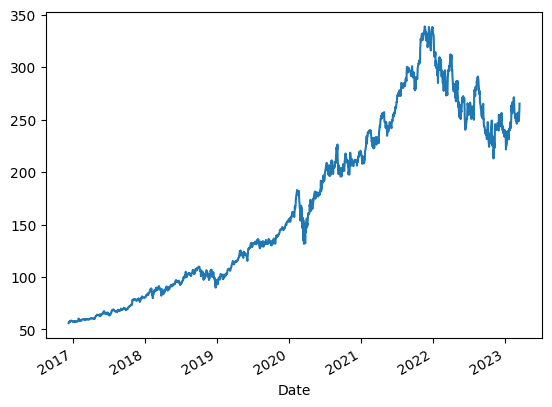

In [24]:
df.Close.plot()

## Practice to master the knowledge

Work on the challenge with another dataset:

1. Learn the <a>mental models</a> to solve the challenge faster.
2. Complete the <a href="03C_Backtesting ML Classification-Based.ipynb">notebook</a>.